
# Prospecção de Dados 2022/2023

## Lab class TP07

# Unsupervised Learning [Part 1]

*An unsupervised Learning Tutorial by Andre Falcao (DI/FCUL 2021-2023)*

### Summary

1. K-Means
2. Hieararchical Agglomerative Clustering




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## 1. KMeans

### 1.1 Starting Data

Let's start with a sample dataset of 12 points randomly defined on a 2D place. Kmeans requires that the data is defined in a metric space

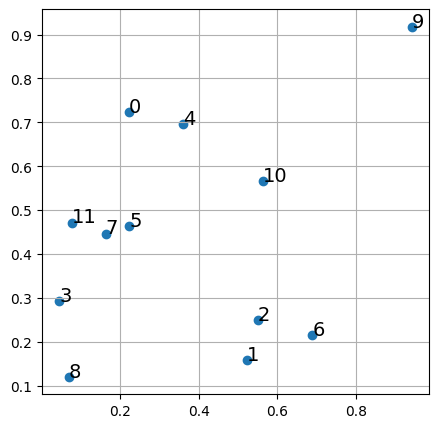

In [2]:
N=12
np.random.seed(16)
x=np.random.random(N)
y=np.random.random(N)
fig = plt.figure(figsize=(5,5))
plt.scatter(x,y)
for i in range(N): plt.annotate(str(i), (x[i], y[i]), size=14)
plt.grid()
plt.show()

Now let's create a data frame for the $x$ and $y$ vectors defining $(x,y)$ points:

In [3]:
import pandas as pd
dat=np.array([x,y]).transpose()
D={"X":x, "Y":y}
pd.DataFrame(D)


,X,Y
0,0.223291,0.722641
1,0.523163,0.158452
2,0.550701,0.250281
3,0.045602,0.293487
4,0.360729,0.696611
5,0.223081,0.464264
6,0.688726,0.215062
7,0.163731,0.446826
8,0.070325,0.120879
9,0.941011,0.917687


### 1.2. The core of K-means

Remember that the core of k-means algorithm are the following steps:

1. **Inicialise Centroids**: Create a random set of $K$ centroids or follow a known heuristic (like kmeans++)
2. **Compute distance to centroids and assign points to clusters**: Verify which data points are closer to each centroid and assign each point to the closest centroid 
3. **Recompute the centroids**: Move the centroids to a new position according to the assignments made 
4. **Repeat steps 2 and 3 until a criterium is met**: no more points change cluster or maximum iterations reached.

**Exercise:** Discuss. What is the critical part? What takes the longest time?

In [4]:
# A simple implementation of K-means

def initCentroids(dat, K):
    N=len(dat)
    rs=np.random.choice(N, K, replace=False)
    initCentr=dat[rs,]
    return initCentr


def assignClust(dat, cents):
    #receives as arguments the data set and the centroids.
    # for each instance of the dataset assigns it to the closest 
    # centroid
    N=len(dat)
    attrib=[]
    #This is the critical part - O(KxN)
    for i in range(N): #for each instance
        d_min  =   1e33
        best_c = 0
        #for each centroid assigns the point to the closest
        for c in range(len(cents)):
            d = np.linalg.norm(dat[i,]-cents[c,])
            if d < d_min:
                d_min=d
                best_c=c
        attrib.append(best_c)
    return np.array(attrib)
        
def moveCentroids(dat, assigs, K):
    N,M=dat.shape
    cents=np.zeros((K,M))
    for k in range(K): cents[k]=dat[assigs==k,:].mean(axis=0)
    return cents       


#### Now let's run the first iteration with K=2

First initialize the centroids with a random sample from the data and then assign each point in the dataset to the closest centroid. 



In [5]:
np.random.seed(0)

K=2
initCentr=initCentroids(dat, K)

print("These are the initial centroids:\n", initCentr)
assigs=assignClust(dat, initCentr)

print("And these are the initial assignments:", assigs)

These are the initial centroids:
 [[0.68872616 0.21506214]
 [0.07799234 0.47201932]]
And these are the initial assignments: [1 0 0 1 1 1 0 1 1 0 0 1]


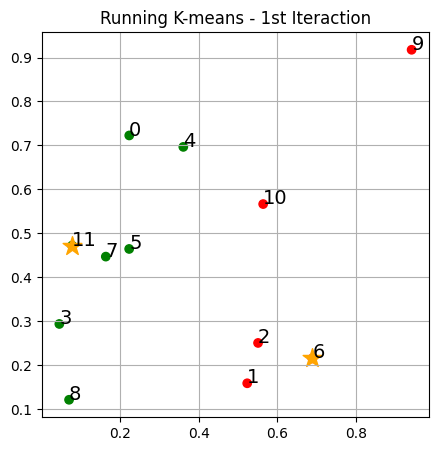

In [6]:
def plot_kmeans(x,y, assigs, centrs,title, labels=True):
    N=x.shape[0]
    color_assigs=list(np.array(["r", "g", "b", "k", "c"])[assigs]) #this is only good for um to 3 colors
    plt.figure(figsize=(5,5))
    plt.title(title)
    plt.scatter(x, y,c=color_assigs)
    plt.scatter(centrs[:,0], centrs[:,1], c="orange", marker="*", s=200)
    if labels:
        for i in range(N): plt.annotate(str(i), (x[i], y[i]), size=14)
    plt.grid()
    plt.show()

plot_kmeans(x,y, assigs, initCentr,'Running K-means - 1st Iteraction')

In [7]:
newCentrs=moveCentroids(dat, assigs, K)
print("These are the new centroids:")
for i in range(K):
    print(newCentrs[i])

newAssigs=assignClust(dat, newCentrs)

N=dat.shape[0]
print("\nAnd these are the new assignments:")
for i in range(N):
    print("%6.3f  %6.3f  -> %d" % (dat[i,0], dat[i, 1], newAssigs[i]))


These are the new centroids:
[0.65345664 0.42158579]
[0.16639306 0.45953241]

And these are the new assignments:
 0.223   0.723  -> 1
 0.523   0.158  -> 0
 0.551   0.250  -> 0
 0.046   0.293  -> 1
 0.361   0.697  -> 1
 0.223   0.464  -> 1
 0.689   0.215  -> 0
 0.164   0.447  -> 1
 0.070   0.121  -> 1
 0.941   0.918  -> 0
 0.564   0.566  -> 0
 0.078   0.472  -> 1


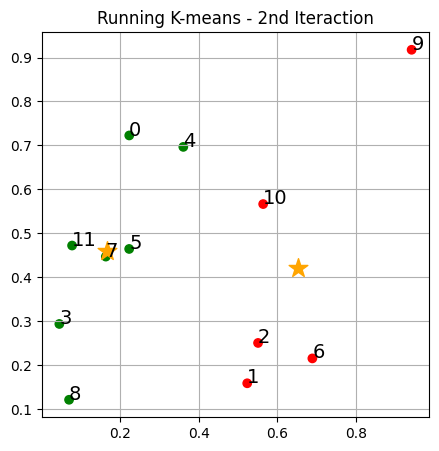

In [8]:
plot_kmeans(x,y, newAssigs, newCentrs, 'Running K-means - 2nd Iteraction')

This whole process could be automated and run the procedure as many times as necessary until no more item changes cluster.

Let's thus repeat it with the same seed:


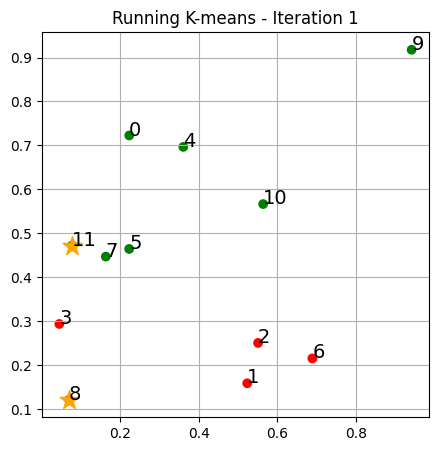

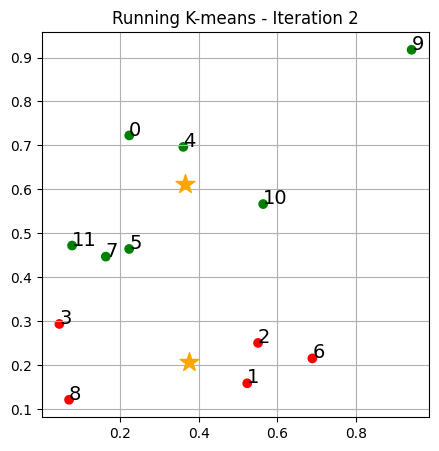

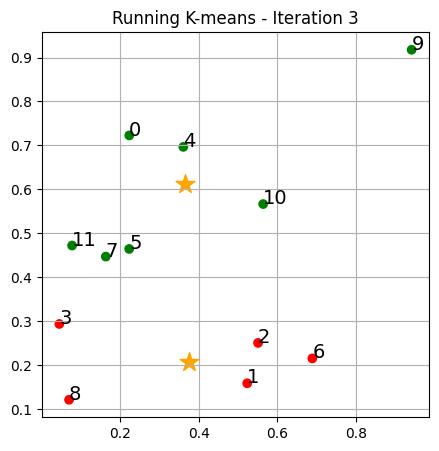

The final assignments are:  [1 0 0 0 1 1 0 1 0 1 1 1]
The final centroids are:  [[0.37570356 0.20763233]
 [0.36478812 0.61235632]]


In [22]:
np.random.seed(6)
K=2
done=False

centrs=initCentroids(dat, K)
assigs=assignClust(dat, centrs)
plot_kmeans(dat[:,0],dat[:,1], assigs, centrs, 'Running K-means - Iteration %d' % 1)

i=2
while not done:
    ncentrs=moveCentroids(dat, assigs, K)
    assigs=assignClust(dat, ncentrs)
    plot_kmeans(dat[:,0],dat[:,1], assigs, ncentrs, 'Running K-means - Iteration %d' % i)
    if np.sum((centrs-ncentrs)**2)<0.001:  done=True
    centrs=ncentrs[:,:]
    i+=1
print("The final assignments are: ", assigs)
print("The final centroids are: ", centrs)


#### Exercises

1. Change the seed and verify the resulting clusters [check only the final result and centroids]
2. Change K from 2 to 4 and check the "consistency of the clusters [Just present the cluster assignments]
    1. What the challenges in such comparisons?

In [26]:
#Exercise 1 - Solution
np.random.seed(9)
K=2
done=False

centrs=initCentroids(dat, K)
assigs=assignClust(dat, centrs)
#plot_kmeans(dat[:,0],dat[:,1], assigs, centrs, 'Running K-means - Iteration %d' % 1)

i=2
while not done:
    ncentrs=moveCentroids(dat, assigs, K)
    assigs=assignClust(dat, ncentrs)
    #plot_kmeans(dat[:,0],dat[:,1], assigs, ncentrs, 'Running K-means - Iteration %d' % i)
    if np.sum((centrs-ncentrs)**2)<0.001:  done=True
    centrs=ncentrs[:,:]
    i+=1
print("The final assignments are: ", assigs)
#print("The final centroids are: ", centrs, sep="\n")

The final assignments are:  [0 0 0 0 0 0 0 0 0 1 0 0]


In [25]:
#Exercise 2 - Solution
np.random.seed(6)

K=4
for K in [2,3,4]:
    done=False

    centrs=initCentroids(dat, K)
    assigs=assignClust(dat, centrs)
    #plot_kmeans(dat[:,0],dat[:,1], assigs, centrs, 'Running K-means - Iteration %d' % 1)

    i=2
    while not done:
        ncentrs=moveCentroids(dat, assigs, K)
        assigs=assignClust(dat, ncentrs)
        #plot_kmeans(dat[:,0],dat[:,1], assigs, ncentrs, 'Running K-means - Iteration %d' % i)
        if np.sum((centrs-ncentrs)**2)<0.001:  done=True
        centrs=ncentrs[:,:]
        i+=1
    print("The final assignments are: ", assigs)
    #print("The final centroids are: ", centrs, sep="\n")


The final assignments are:  [1 0 0 0 1 1 0 1 0 1 1 1]
The final assignments are:  [1 2 2 0 1 1 2 1 0 2 2 1]
The final assignments are:  [3 1 1 0 3 0 1 0 0 2 2 0]


Now with 30 samples and 3 Centroids

[[0.54255988 0.8934476 ]
 [0.48603187 0.8072193 ]
 [0.57342904 0.82003712]]


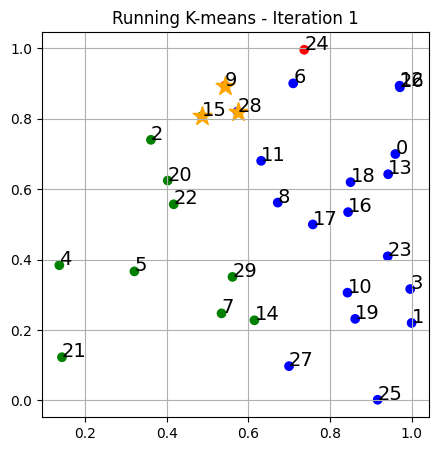

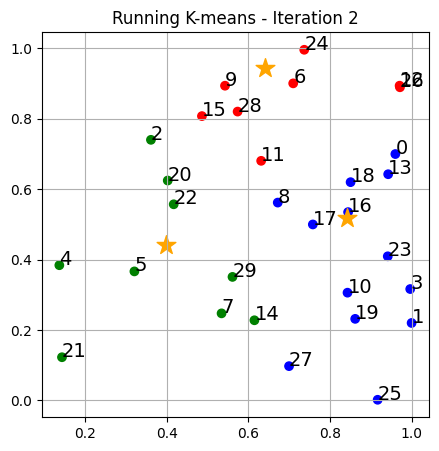

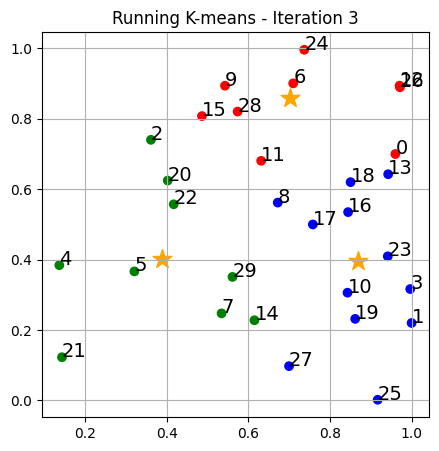

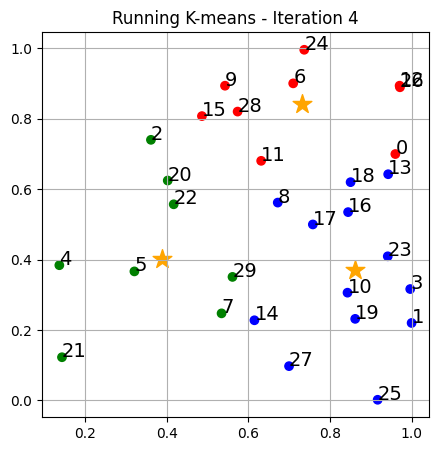

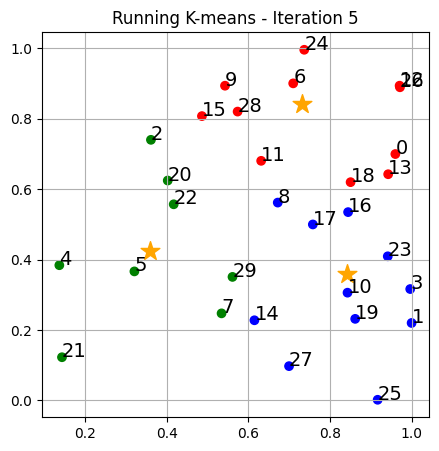

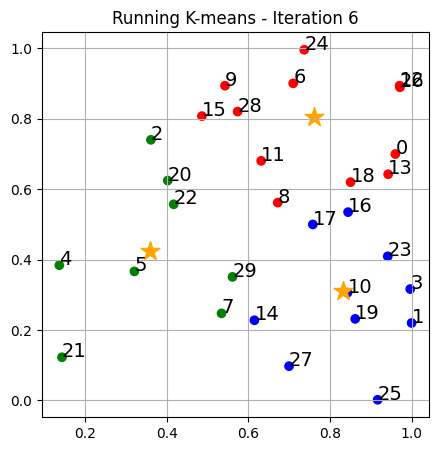

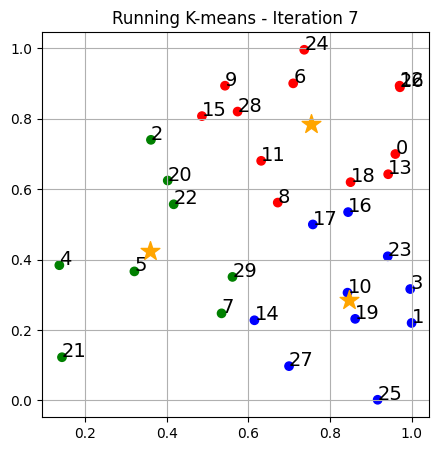

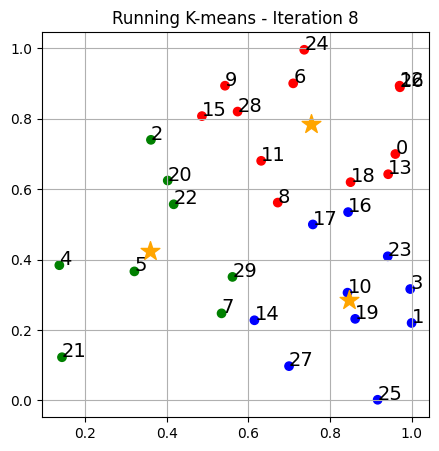

The final assignments are:  [0 2 1 2 1 1 0 1 0 0 2 0 0 0 2 0 2 2 0 2 1 1 1 2 0 2 0 2 0 1]
The final centroids are:  [[0.75382754 0.78352623]
 [0.35940147 0.42404356]
 [0.84749547 0.2844972 ]]


In [12]:

N=30
np.random.seed(24)
dat=np.random.random((N,2))

K=3
done=False

#centrs=initCentroids(dat, K)
centrs=dat[(9,15,28),:]
print(centrs)
assigs=assignClust(dat, centrs)
plot_kmeans(dat[:,0],dat[:,1], assigs, centrs, 'Running K-means - Iteration %d' % 1)

i=2
while not done:
    ncentrs=moveCentroids(dat, assigs, K)
    assigs=assignClust(dat, ncentrs)
    plot_kmeans(dat[:,0],dat[:,1], assigs, ncentrs, 'Running K-means - Iteration %d' % i)
    if np.sum((centrs-ncentrs)**2)<0.001:  done=True
    centrs=ncentrs[:,:]
    i+=1

print("The final assignments are: ", assigs)
print("The final centroids are: ", centrs)


Observe the convex shape of all clusters


#### Making a reusable function

Obviously it is unpractical to do everything like this every time, but we can wrap it up in a function

In [27]:
def my_kmeans(dat, K, seed=None):
    if seed is None: 
        np.random.seed(42)
    else:
        np.random.seed(seed)
    done=False
    centrs=initCentroids(dat, K)
    assigs=assignClust(dat, centrs)
    while not done:
        ncentrs=moveCentroids(dat, assigs, K)
        if np.sum((centrs-ncentrs)**2)<0.001:  done=True
        centrs=ncentrs[:,:]
        assigs=assignClust(dat, centrs)
    return assigs, centrs



In [28]:
#this is how we run it
N=dat.shape[0]
K=3
assigs, centrs=my_kmeans(dat, K)


This is how we check the result

These are the final centroids:
[0.58156809 0.29756049]
[0.94101086 0.91768701]
[0.16639306 0.45953241]

And these are the new assignments:
 0.223   0.723  -> 2
 0.523   0.158  -> 0
 0.551   0.250  -> 0
 0.046   0.293  -> 2
 0.361   0.697  -> 2
 0.223   0.464  -> 2
 0.689   0.215  -> 0
 0.164   0.447  -> 2
 0.070   0.121  -> 2
 0.941   0.918  -> 1
 0.564   0.566  -> 0
 0.078   0.472  -> 2


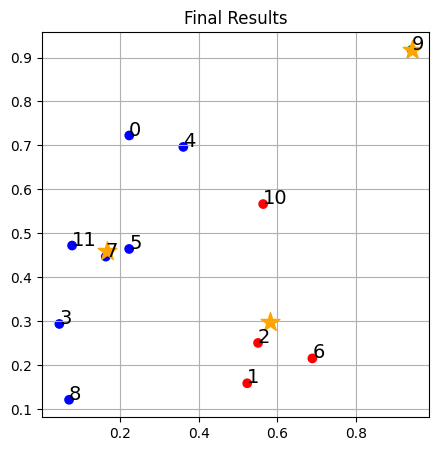

In [29]:
print("These are the final centroids:")
for i in range(K):
    print(centrs[i])

print("\nAnd these are the new assignments:")
for i in range(N):
    print("%6.3f  %6.3f  -> %d" % (dat[i,0], dat[i, 1], assigs[i]))
plot_kmeans(dat[:,0],dat[:,1], assigs, centrs, 'Final Results' )

### 1.3 A slightly more complex example - the iris dataset

Let's check out our minimalistic k-means with 150 samples and 4 variables

In [30]:
from sklearn.datasets import load_iris
iris = load_iris()['data']
assigs, centrs= my_kmeans(iris, 3)

And let's check the results in 2D - pick up the first 2 variables but other could have been picked as well [Try it!]

In [31]:
centrs[:,0], centrs[:,1]

(array([5.9016129, 5.006    , 6.85     ]),
 array([2.7483871 , 3.428     , 3.07368421]))

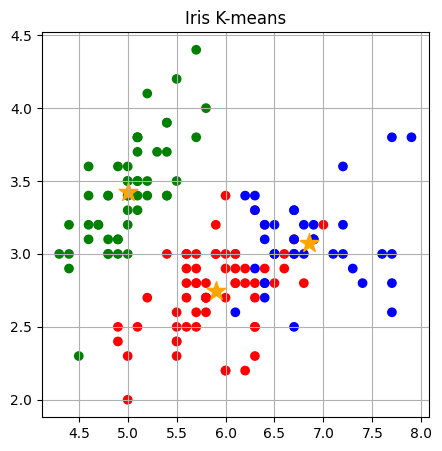

In [32]:
v1=0
v2=1
plot_kmeans(iris[:,v1],iris[:,v2], assigs, centrs[:,(v1,v2)], 'Iris K-means', labels=False)

### 1.4. K-Means in Scikit-Learn

[k-means is obviously on scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) and it can be very easily used with similar procedures common to most sklearn objects

Scikit-learn kmeans results: [0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0]
Scikit-learn kmeans centroids:
[0.16639306 0.45953241]
[0.65345664 0.42158579]


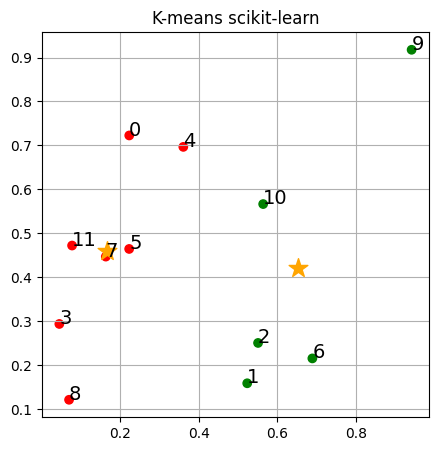

In [33]:
from sklearn.cluster import KMeans

K=2
np.random.seed(16)
x=np.random.random(12)
y=np.random.random(12)
dat=np.array([x,y]).transpose()

kmeans = KMeans(n_clusters=K, random_state=0)
kmeans = kmeans.fit(dat)

assigs=list(kmeans.labels_)
centrs=kmeans.cluster_centers_
print("Scikit-learn kmeans results:",   assigs)

print("Scikit-learn kmeans centroids:")
for i in range(K):
    print(centrs[i,:])

plot_kmeans(x,y, assigs, centrs,'K-means scikit-learn')

#### Exercise

* compare the results between our implementation and the sklearn. Why are they different? Discuss

## 2. Hierarchical Agglomerative Clustering (HAC)



### 2.1. Build a "Homebrew" Implementation of HAC

The process used by HAC is quite easy to implement by following a series of simple steps: 

1. **Inicialization**: Each object is a cluster
2. **Create Distance Matrix**: Compute pairwise distances between the clusters
3. Identify the closest clusters
4. Join the closest clusters
5. Recompute the distances from the new cluster to the other clusters
6. Repeat 3 to 5 until all all clusters are merged (or a predefined number of clusters is reached)

First let's initialize the environment:

In [34]:
from functools import reduce
from scipy.spatial import distance_matrix

Now create a function to initialize the clusters. This function will create a list of clusters (one for each point), and a distance matrix between all points. . This initial distance matrix must be preserved until the end, because we will need it to join the new clusters that are being formed. We will use the Euclidean distance, but others could be used.

The initial clusters are simple Python lists of lists as they are easily updateable, and the formation of the clusters can be tracked

In [35]:
def initializeClusts(dat):
    #here we will compute the initial distance matrix
    #and produce the initial trivial clustering
    
    #make distance matrix
    dsts=distance_matrix(dat, dat)
    nrow, ncol=dat.shape
    #make clusters - one per sample as a list of lists
    clusts=[[i] for i in range(nrow)]
    return clusts, dsts


Let's see what happens when we initialize the distance matrix with a dataset. 

Please note that we need to keep two copies of the distance matrix. 
* The first one (`dstInst`) that keeps the individual distances of each instance to all the others;
* and another (`dstClusts`) that has the distances between clusters and is updated continuously 

At the initial step they are the same. For starters let's use just 5 instances 

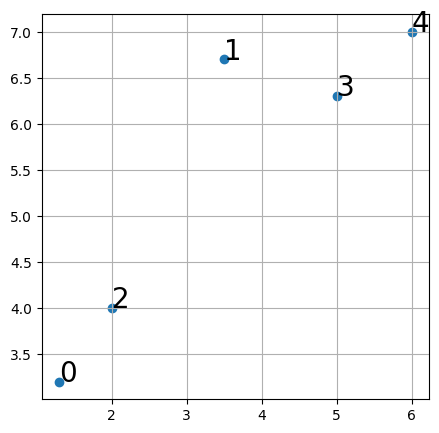

In [36]:
x=[1.3,3.5,2.0,5.0,6.0]
y=[3.2,6.7,4.0,6.3,7.0]

dat=np.array([x,y]).transpose()
plt.figure(figsize=(5,5))
plt.scatter(x,y)
for i in range(5): plt.annotate(str(i), (x[i], y[i]), size=20)
plt.grid()
plt.show()

Now let's begin by creating the first clusters

In [55]:
clusts, dstInst=initializeClusts(dat)

dstClust=dstInst.copy()

print("The clusters:" , clusts, sep="\n")
print("The distance matrix:")
for row in dstClust:
    s=reduce(lambda x,y: x+"%6.3f " % (y), row, "")
    print(s)

The clusters:
[[0], [1], [2], [3], [4]]
The distance matrix:
 0.000  4.134  1.063  4.827  6.044 
 4.134  0.000  3.089  1.552  2.518 
 1.063  3.089  0.000  3.780  5.000 
 4.827  1.552  3.780  0.000  1.221 
 6.044  2.518  5.000  1.221  0.000 


#### The Core functions

HAC depends on a series of basic functions for working:

* 1. `findMinDists()` - given a distance matrix between clusters returns the clusters that are closer together
* 2. `joinClusts()` - receives the current clusters, the respective distance matrix and the "joinable" clusters, and actually joins them in the clusters and the distance matrix data structures.

In [53]:
def findMinDist(dstMat):
    N, ncol=np.shape(dstMat)
    #search for the smallest distance
    minDist=1e33
    for r1 in range(N-1):
        for r2 in range(r1+1, N):
            if dstMat[r1][r2]<minDist:
                minDist=dstMat[r1][r2]
                sr1, sr2 = r1, r2
    return sr1, sr2, minDist


def joinClusts(dstMat, clusts, j1, j2):
    #we're going to merge cluster j2 into j1
    #j2 is always bigger than j1
    #first add clust j2 to j1 and drop j2 from the pool
    clusts[j1]=clusts[j1]+clusts[j2]
    del clusts[j2]
    # now we have to eliminate col and row from all instances j1 in the distance matrix
    dstMat=np.delete(dstMat, j2, axis=0)
    dstMat=np.delete(dstMat, j2, axis=1)
    return dstMat


Let's test both functions on the current clustering and distance matrix, first to identify the closest instances and then to join them in a single cluster. 

In [56]:
j1,j2, minD=findMinDist(dstClust)
dstClust=joinClusts(dstClust, clusts, j1, j2)
print("The clusters:" , clusts, sep="\n")
print("The distance matrix (it is poorly calculated for the the row and column of the new cluster):")
for row in dstClust:
    s=reduce(lambda x,y: x+"%6.3f " % (y), row, "")
    print(s)

The clusters:
[[0, 2], [1], [3], [4]]
The distance matrix (it is poorly calculated for the the row and column of the new cluster):
 0.000  4.134  4.827  6.044 
 4.134  0.000  1.552  2.518 
 4.827  1.552  0.000  1.221 
 6.044  2.518  1.221  0.000 


It is possible to verify that points 0 and 2 are together now, and the distance matrix is reduced to a 4x4 matrix, as cluster [2] has been deleted.

#### Update the distances

Note the distances from cluster [0,2] to the other clusters are now wrong. 

Despite the fact that we have removed the row and column of cluster 2, the new cluster has now two elements and thus its distances to the other clusters need to be updated. Here is where an heuristic is required to evaluate the distance between clusters. There are several possibilities (single-linkage, complete-linkage, etc).

We only need to compute afresh the distances for the new cluster as there were no other changes in the matrix.

For this case we are going to use CompleteLinkage, namely, the **longest distance between any two instances of each cluster**

#### Exercise:
* Implement Average linkage as the average of all cluster distances

In [40]:
#here we will recompute the distances for j1 to all the other clusts

def completeLinkage(dstMat, cl1, cl2):
    maxD=0
    for it1 in cl1:
        for it2 in cl2:
            if dstMat[it1][it2]>maxD: maxD=dstMat[it1][it2]
    return maxD

def singleLinkage(dstMat, cl1, cl2):
    minD=1e34
    for it1 in cl1:
        for it2 in cl2:
            if dstMat[it1][it2]<minD: minD=dstMat[it1][it2]
    return minD

def averageLinkage(dstMat, cl1, cl2):
    #do it as an exercise!
    distance=0
    for it1 in cl1:
        for it2 in cl2:
            distance+=dstMat[it1][it2]
    return distance/(len(cl1) + len(cl2))

def recompDists(dstMat0, dstMat, clusts, j1, method="CL"):
    #we need the original distances as we require each individual distance
    #let's operate with complete linkage (maximum distance)
    cl1=clusts[j1]
    for j2 in range(len(clusts)):
        if j2 != j1:
            cl2=clusts[j2]
            if method=="CL":
                D=completeLinkage(dstMat0, cl1, cl2)
            elif method=="SL":
                D=singleLinkage(dstMat0, cl1, cl2)
            elif method=="AL":
                D=averageLinkage(dstMat0, cl1, cl2)   # be careful if it is not implemented!!!
            else:
                raise Exception(method+" - Not yet implemented!")
            dstMat[j1][j2]=D
            dstMat[j2][j1]=D

Now process the current data:

In [57]:
print("The clusters:" , clusts, sep="\n")

recompDists(dstInst, dstClust, clusts, j1)
print("The distance matrix:")
for row in dstClust:
    s=reduce(lambda x,y: x+"%6.3f " % (y), row, "")
    print(s)

The clusters:
[[0, 2], [1], [3], [4]]
The distance matrix:
 0.000  4.134  4.827  6.044 
 4.134  0.000  1.552  2.518 
 4.827  1.552  0.000  1.221 
 6.044  2.518  1.221  0.000 


In [58]:
print("The clusters:" , clusts, sep="\n")

recompDists(dstInst, dstClust, clusts, j1)
print("The distance matrix:")
for row in dstClust:
    s=reduce(lambda x,y: x+"%6.3f " % (y), row, "")
    print(s)

The clusters:
[[0, 2], [1], [3], [4]]
The distance matrix:
 0.000  4.134  4.827  6.044 
 4.134  0.000  1.552  2.518 
 4.827  1.552  0.000  1.221 
 6.044  2.518  1.221  0.000 


#### Iterating the process

Now we have 4 clusters out of the original 5 points. The HAC procedure is then repeated to reduce to 3 clusters and then on until only 2 clusters remain. With 3 clusters, point 3 is joined with point 4 to form new cluster [3,4] 

In [59]:
j1,j2, minD=findMinDist(dstClust)

dstClust=joinClusts(dstClust, clusts, j1, j2)

recompDists(dstInst, dstClust, clusts, j1)

print("The clusters:" , clusts, sep="\n")
print("The distance matrix:")
for row in dstClust:
    s=reduce(lambda x,y: x+"%6.3f " % (y), row, "")
    print(s)

The clusters:
[[0, 2], [1], [3, 4]]
The distance matrix:
 0.000  4.134  6.044 
 4.134  0.000  2.518 
 6.044  2.518  0.000 


The next step joins cluster [1] with cluster [3,4]

In [60]:
j1,j2, minD=findMinDist(dstClust)

dstClust=joinClusts(dstClust, clusts, j1, j2)

recompDists(dstInst, dstClust, clusts, j1)

print("The clusters:" , clusts, sep="\n")
print("The distance matrix:")
for row in dstClust:
    s=reduce(lambda x,y: x+"%6.3f " % (y), row, "")
    print(s)

The clusters:
[[0, 2], [1, 3, 4]]
The distance matrix:
 0.000  6.044 
 6.044  0.000 


Since we have only two clusters this is the final clustering.

In [61]:
j1,j2, minD=findMinDist(dstClust)
dstClust=joinClusts(dstClust, clusts, j1, j2)
recompDists(dstInst, dstClust, clusts, j1)

print("The clusters:" , clusts, sep="\n")
print("The distance matrix:")
for row in dstClust:
    s=reduce(lambda x,y: x+"%6.3f " % (y), row, "")
    print(s)

The clusters:
[[0, 2, 1, 3, 4]]
The distance matrix:
 0.000 


#### Putting it all together - the hclust() function

This whole procedure can be automated with only one function that takes 2 parameters: 

* 1 - dataset in a `np.array` format 
* 2 - number of clusters (stopping criteria). 

The function will return the clusters formed as a `list` of lists.

Note that we are only using complete linkage. No algorithmic choice whatsoever is given

In [62]:
def hclust(dat, k=2):
    N=len(dat)
    clusts, dstInst=initializeClusts(dat)
    dstClust=dstInst.copy()
    for i in range(N-k):
        j1,j2, minD=findMinDist(dstClust)
        dstClust=joinClusts(dstClust, clusts, j1, j2)
        recompDists(dstInst, dstClust, clusts, j1)
    return clusts

Now let's check it!

In [63]:
clusts=hclust(dat, 3)
print("The clusters:" , clusts, sep="\n")

The clusters:
[[0, 2], [1], [3, 4]]


It looks as if it is working! 

Now let's try it with a dataset of 10 points and use a scatter plot to see the result.

In [64]:
def scatterClusts(X,Y,clusts, labels=True):
    N=len(X)
    cols=[0]*N
    c=0
    for clust in clusts:
        for item in clust:
            cols[item]=c            
        c+=1
    #up to 4 colors
    color_assigs=list(np.array(["r", "g", "b", "k"])[cols])
    plt.figure(figsize=(5,5))
    plt.scatter(X, Y ,c=color_assigs)
    if labels==True:
        for i in range(N): plt.annotate(str(i), (X[i], Y[i]), size=14)
    plt.grid()
    plt.title('Clustering plot')
    plt.show()

The clusters:
[[0, 2, 7, 9], [1, 3, 4], [5, 6], [8]]


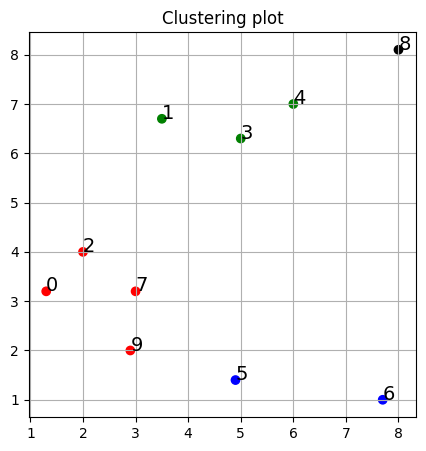

In [65]:
x=[1.3,3.5,2.0,5.0,6.0,4.9,7.7,3.0,8.0,2.9]
y=[3.2,6.7,4.0,6.3,7.0,1.4,1.0,3.2,8.1,2.0]

dat10=np.array([x,y]).transpose()

clusts=hclust(dat10, 4)
print("The clusters:" , clusts, sep="\n")

scatterClusts(dat10[:,0], dat10[:,1], clusts)

#### And now with the iris dataset

The clusters:
[0, 17, 40, 7, 39] ... 50
[50, 52, 86, 77, 54] ... 60
[53, 89, 69, 80, 81] ... 28
[102, 125, 129, 107, 130] ... 12


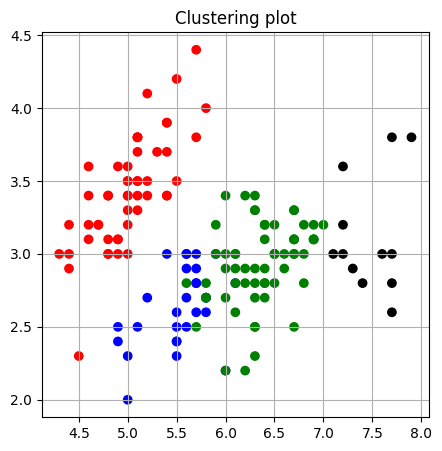

In [66]:
from sklearn.datasets import load_iris
iris = load_iris()['data']
clusts=hclust(iris, 4)
print("The clusters:")
for c in clusts:
    print(c[:5],"...", len(c))

scatterClusts(iris[:,0], iris[:,1], clusts, False)

### 2.2. HAC in Scikit-Learn

HAC is very  well [implemented in Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) with 4 different clustering methods and many parameter options


The scikit-learn clusters:
[0, 1, 2, 3, 4] ... 50
[50, 51, 52, 54, 56] ... 60
[53, 55, 57, 59, 60] ... 28
[102, 105, 107, 109, 117] ... 12


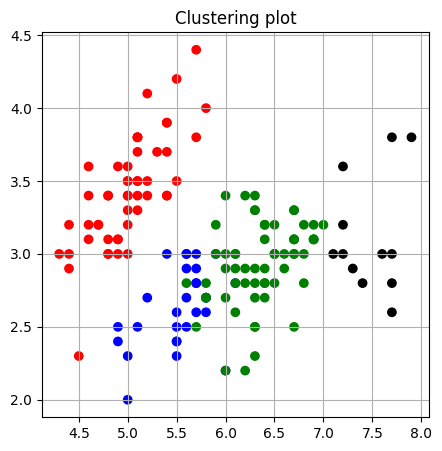

In [67]:
from sklearn.cluster import AgglomerativeClustering

n_clusters=4
model = AgglomerativeClustering(linkage="complete", n_clusters=n_clusters)
model.fit(iris)
skclusts=[[] for i in range(n_clusters)]

for i in range(len(model.labels_)):
    skclusts[model.labels_[i]].append(i)

print("The scikit-learn clusters:")
for c in skclusts:
    print(c[:5],"...", len(c))

scatterClusts(iris[:,0], iris[:,1], skclusts, False)

We can check the different results according to distance computation methods

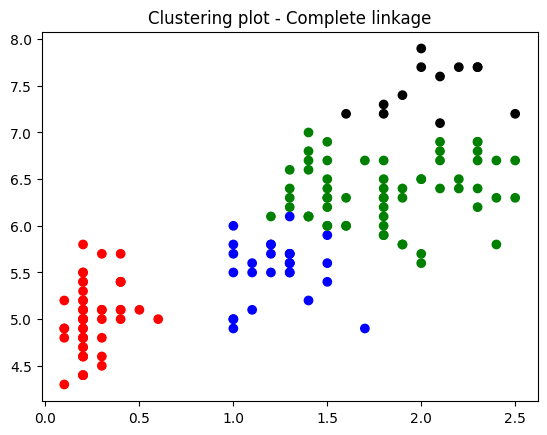

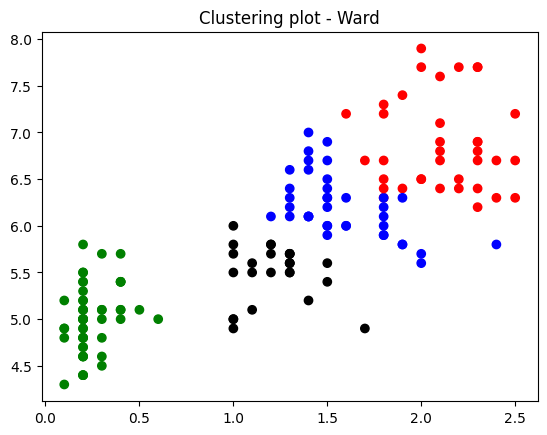

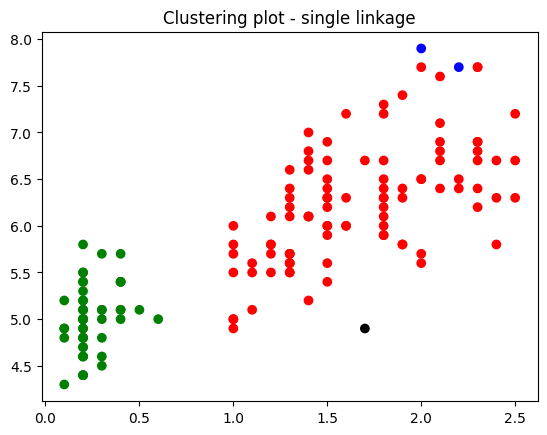

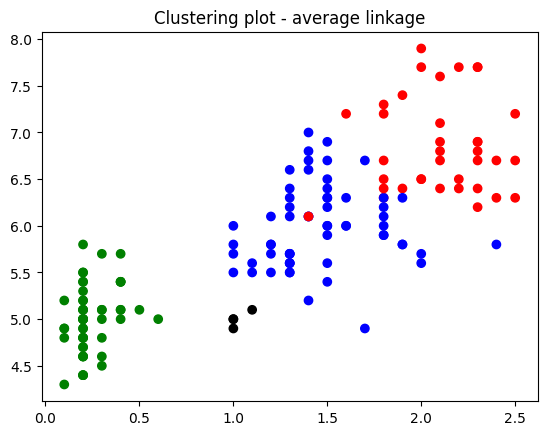

In [68]:
model = AgglomerativeClustering(linkage="complete", n_clusters=n_clusters)
model.fit(iris)
v1=3
v2=0
color_assigs=list(np.array(["r", "g", "b", "k"])[model.labels_])
plt.scatter(iris[:,v1], iris[:,v2] ,c=color_assigs)
plt.title('Clustering plot - Complete linkage')
plt.show()

model = AgglomerativeClustering(linkage="ward", n_clusters=n_clusters)
model.fit(iris)
color_assigs=list(np.array(["r", "g", "b", "k"])[model.labels_])
plt.scatter(iris[:,v1], iris[:,v2] ,c=color_assigs)
plt.title('Clustering plot - Ward')
plt.show()

model = AgglomerativeClustering(linkage="single", n_clusters=n_clusters)
model.fit(iris)
color_assigs=list(np.array(["r", "g", "b", "k"])[model.labels_])
plt.scatter(iris[:,v1], iris[:,v2] ,c=color_assigs)
plt.title('Clustering plot - single linkage')
plt.show()


model = AgglomerativeClustering(linkage="average", n_clusters=n_clusters)
model.fit(iris)
color_assigs=list(np.array(["r", "g", "b", "k"])[model.labels_])
plt.scatter(iris[:,v1], iris[:,v2] ,c=color_assigs)
plt.title('Clustering plot - average linkage')
plt.show()



#### Exercises

How is the performance of HAC and KMeans in real world datasets? Scikit-learn has a [corpus of several real world datasets](https://scikit-learn.org/stable/datasets/real_world.html) that can be used for testing modeling approaches

* Each group shoud experiment with one of the following data sets: 
    * fetch_lfw_pairs, 
    * fetch_california_housing,
    * fetch_lfw_people, fetch_covtype
* Each group shoud verify the impact on the algorithm performance according to:
    * Number of samples
    * Number of variables
    * number of clusters 

In [69]:
from sklearn.datasets import fetch_lfw_pairs, fetch_california_housing, fetch_lfw_people, fetch_covtype


In [70]:
C=fetch_covtype()
C.data.shape

(581012, 54)

In [71]:
data=C.data

mdl = AgglomerativeClustering(linkage="ward", n_clusters=10)

import time
times=[]
for N in [1000, 2000, 4000, 8000, 16000, 32000]:
    D=data[:N,:]
    t1=time.time()
    model.fit(D)
    times.append(time.time()-t1)
print(times)


[0.03778266906738281, 0.11597847938537598, 0.47022104263305664, 2.5860447883605957, 12.475269556045532, 68.14695930480957]


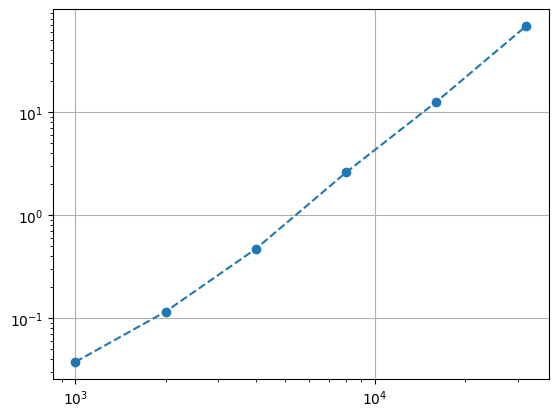

In [82]:
y=np.array(times)
x=np.array([1000, 2000, 4000, 8000, 16000, 32000])
plt.plot(x,y,"--o")
plt.xscale("log")
plt.yscale("log")
plt.grid()
plt.show()

           

In [83]:
#data=C.data

mdl = AgglomerativeClustering(linkage="ward", n_clusters=10)

import time
times=[]
for N in [1000, 2000, 4000, 8000, 16000, 32000]:
    D=data[:N,:]
    t1=time.time()
    mdl.fit(D)
    times.append(time.time()-t1)
print(times)

[0.031279802322387695, 0.14722776412963867, 0.5533175468444824, 2.755295753479004, 12.043180704116821, 60.52261447906494]


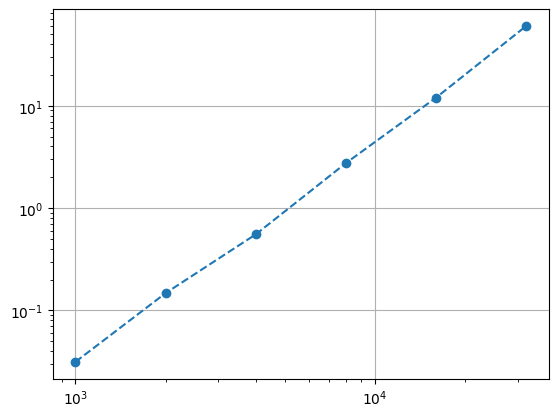

In [84]:
y=np.array(times)
x=np.array([1000, 2000, 4000, 8000, 16000, 32000])
plt.plot(x,y,"--o")
plt.xscale("log")
plt.yscale("log")
plt.grid()
plt.show()

In [85]:
times

[0.031279802322387695,
 0.14722776412963867,
 0.5533175468444824,
 2.755295753479004,
 12.043180704116821,
 60.52261447906494]

### Evaluating clusters

There are several alternatives to evaluate clusters and we are going to address them in next class, but a very simple approach would be to compute the average distance of each item to its centroid, or to all elements of that same cluster, and compute that score for all clusters, getting an overall average distance

#### Exercises
1. Think about the application of the above strategy. How would it work in practice?
    1. In particular think what whould happen in K=N and if K=1
    2. whoat would be the general behaviour of this score as we increase K?
2. [to do at home!] Implement such strategy and test it with some of the above defined datasets
